In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import datetime
import time
from sklearn.ensemble import RandomForestRegressor

In [78]:
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [79]:
df = pd.read_csv('data.csv', encoding='gbk')

In [80]:
df.shape

(4754, 90)

In [81]:
df.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


# 数据类型分析

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

原数据中数值型特征有 83 个，字符串类型特征有 7 个，多数特征缺失值不是特别多，student_feature 缺失值较多。

In [83]:
df.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [84]:
df.describe(include='O')

,trade_no,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
count,4754,4754,4752,4754,4478,4450,4457
unique,4754,1,5,1,4309,207,232
top,20180507121730945000000023082786,卡号1,一线城市,xs,李明,2018-04-14,2018-05-03
freq,1,4754,3403,4754,5,423,134


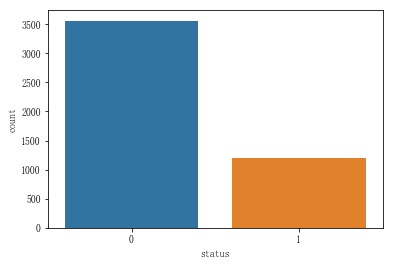

In [85]:
sns.countplot(df['status'])

# 无关特征删除

## 类别特征

### bank_card_no 和 source

bank_card_no 和 source unique 等于 1，删除

In [86]:
df.drop(['bank_card_no', 'source'], axis=1, inplace=True)

### trade_no

In [87]:
df['trade_no'].head(10)

0    20180507115231274000000023057383
1    20180507121002192000000023073000
2    20180507125159718000000023114911
3    20180507121358683000000388283484
4    20180507115448545000000388205844
5    20180507121233054000000388275132
6    20180507121931540000000388298915
7    20180507124659235000000023105807
8    20180507115855621000000388224458
9    20180504155156296000000021138084
Name: trade_no, dtype: object

In [88]:
df['trade_no'].tail(10)

4744    20180507115029481000000388194850
4745    20180507123619864000000388369012
4746    20180507125012243000000023109396
4747    20180507123811494000000388377504
4748    20180507121025853000000388266701
4749    20180507120519228000000388247328
4750    20180507114937914000000388192877
4751    20180507121340509000000388278785
4752    20180504161827128000000381357758
4753    20180507124243041000000388391027
Name: trade_no, dtype: object

In [89]:
def parse_trade_no(array):
    lst = [array[:4], array[4:6], array[6:8], array[-10:]]
    return lst

In [90]:
tradeno_df = pd.DataFrame(df['trade_no'].apply(parse_trade_no).values.tolist(), columns=['tradeno_year', 'tradeno_month', 'tradeno_day', 'tradeno_id'])

In [91]:
tradeno_df.describe()

,tradeno_year,tradeno_month,tradeno_day,tradeno_id
count,4754,4754,4754,4754
unique,1,1,3,4754
top,2018,05,07,0388350370
freq,4754,4754,3682,1


In [92]:
tradeno_df['tradeno_day'].value_counts()

07    3682
04    1062
08      10
Name: tradeno_day, dtype: int64

trade_no 字段像个 id 字段，假设前 8 位是年月日信息，可以看出 trade_no 均是在 2018 年 5 月份，tradeno_id 各不相同，保留 tradeno_day，其他的信息删除。

In [93]:
df = pd.concat((df.drop('trade_no', axis=1), tradeno_df['tradeno_day']), axis=1)

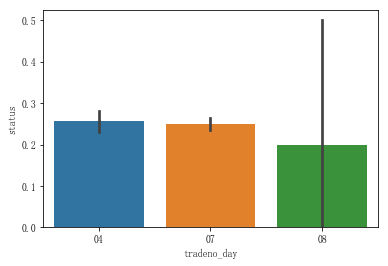

In [94]:
sns.barplot(data=df, x='tradeno_day', y='status')

### id_name

找出出现次数比较多的人名，看看逾期率

In [95]:
idname_count=df['id_name'].value_counts()

idname_count = idname_count[idname_count>=4]

idn_df = df[df['id_name'].isin(idname_count.index)]

In [96]:
idn_df['id_name'].value_counts()

李明    5
张龙    5
李杰    5
张伟    4
陈鹏    4
李波    4
张超    4
刘强    4
陈波    4
Name: id_name, dtype: int64

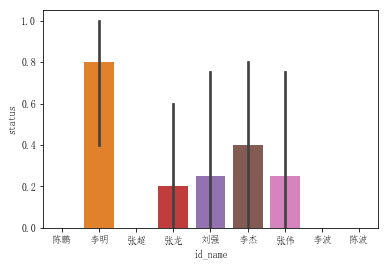

In [97]:
sns.barplot(data=idn_df, x='id_name', y='status')

李明这个人逾期率挺高的，重点提出来作为类别变量

In [98]:
df['is_Li_Ming'] = (df['id_name'] == '李明').apply(int)

In [99]:
df.drop('id_name', inplace=True, axis=1)

## 数值特征

In [100]:
value_cols = df.describe().columns

In [101]:
df[value_cols].nunique().describe()

count      84.000000
mean      480.880952
std      1046.966846
min         2.000000
25%        25.000000
50%        60.500000
75%       216.250000
max      4754.000000
dtype: float64

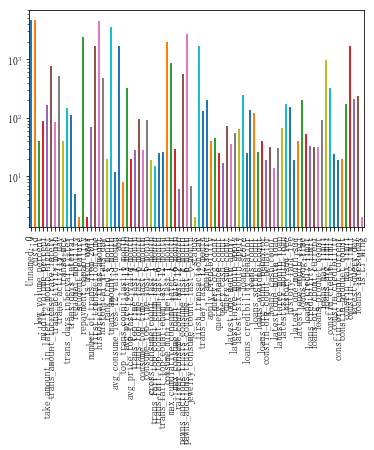

In [102]:
df[value_cols].nunique().plot(kind='bar', logy=True)

In [103]:
print('数值特征 unique < 10 个数：', len(df[value_cols].columns[df[value_cols].nunique()<10]))
print('数值特征 unique < 20 个数：', len(df[value_cols].columns[df[value_cols].nunique()<20]))
print('数值特征 unique < 30 个数：', len(df[value_cols].columns[df[value_cols].nunique()<30]))

数值特征 unique < 10 个数： 8
数值特征 unique < 20 个数： 16
数值特征 unique < 30 个数： 28


In [104]:
print('全部为 unique 的特征', df[value_cols].columns[df[value_cols].nunique()==len(df)])

全部为 unique 的特征 Index(['Unnamed: 0', 'custid'], dtype='object')


从 unique 数量来讲，没有 unique == 1 的情况，先不予删除。

### custid

custid 范围中 100~400W，如果假设注册越早，id 越小，看一下 id 大小与逾期率的关系。

In [105]:
np.logspace(1, 10, 7)

array([1.00000000e+01, 3.16227766e+02, 1.00000000e+04, 3.16227766e+05,
       1.00000000e+07, 3.16227766e+08, 1.00000000e+10])

In [106]:
custid_range = np.logspace(1, 7, 7)[1:]

In [107]:
df['cust_id_bin'] = pd.cut(df['custid'], bins=custid_range, labels=[str(i) for i in custid_range][:-1])

In [108]:
df['cust_id_bin'].value_counts()

1000000.0    3249
100000.0     1342
10000.0       149
1000.0         13
100.0           1
Name: cust_id_bin, dtype: int64

label 为 100 数据太少，并入 1000 中，1000000 之后再详细划分

In [109]:
custid_range = [1, 1e4, 1e5, 1e6, 2.5e6, 5e6]

In [110]:
df['cust_id_bin'] = pd.cut(df['custid'], bins=custid_range, labels=[str(i) for i in custid_range][:-1])

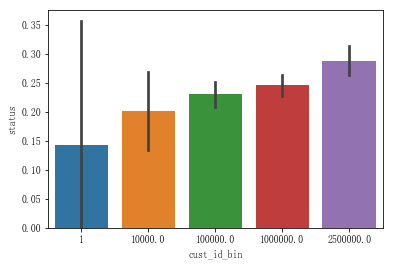

In [111]:
sns.barplot(data=df, x='cust_id_bin', y='status')

正如猜想的一样，id 越小，逾期率越低，可能原因是越最近注册的，是新用户，紧急用钱，越可能逾期。先保留 id 这个特征。

### Unnamed: 0

In [112]:
sum(df['Unnamed: 0'].diff(1)>0)

4753

In [113]:
len(df)

4754

Unnamed: 0 这个特征数值是递增的，删除

In [114]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [115]:
df.head()

,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,tradeno_day,is_Li_Ming,cust_id_bin
0,2791858,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,...,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,07,0,2500000.0
1,534047,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,...,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,07,0,100000.0
2,2849787,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,...,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,07,0,2500000.0
3,1809708,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,...,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,07,0,1000000.0
4,2499829,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,...,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,07,0,1000000.0


In [116]:
len(df.describe().columns)

83

# 数据类型转换

In [117]:
df.describe(include='O')

,reg_preference_for_trad,latest_query_time,loans_latest_time,tradeno_day
count,4752,4450,4457,4754
unique,5,207,232,3
top,一线城市,2018-04-14,2018-05-03,07
freq,3403,423,134,3682


## reg_preference_for_trad

In [118]:
df['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

城市之间存在大小差别，采用自然数编码

In [119]:
city_map = {'一线城市':1, '二线城市':2, '三线城市':3, '其他城市':0, '境外':5}

In [120]:
df['reg_preference_for_trad'] = df['reg_preference_for_trad'].map(city_map)

## tradeno_day

In [121]:
df['tradeno_day'] = df['tradeno_day'].astype('int')

In [122]:
df.describe(include='O')

,latest_query_time,loans_latest_time
count,4450,4457
unique,207,232
top,2018-04-14,2018-05-03
freq,423,134


# 缺失值处理

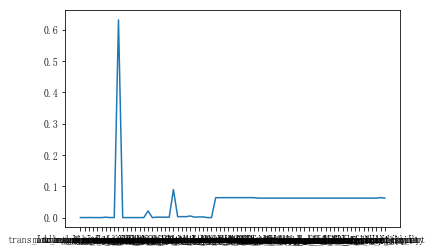

In [123]:
nan_prop = df.isnull().sum(axis=0)[df.isnull().sum(axis=0)!=0]/df.shape[0]
plt.plot(nan_prop)

## 缺失值处理

缺失值大概分成大类，比例在 60%，5%~10%, 1% 左右

### 缺失比例>10%

只有一列，转换成 one-hot 编码

In [124]:
nan10 = df[df.columns[df.isnull().sum(0)/df.shape[0]>0.1]]

In [125]:
nan10.columns

Index(['student_feature'], dtype='object')

In [126]:
nan10['student_feature'].value_counts()

1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [127]:
def parse_student_feature(array):
    lst = [0, 0, 0]
    if array == 1:
        lst[0] = 1
    elif array == 2:
        lst[1] = 1
    else:
        lst[2] = 1
    return lst

In [128]:
stu_featdf = pd.DataFrame(df['student_feature'].apply(parse_student_feature).values.tolist(), columns=['student_feat_1', 'student_feat_2', 'student_feat_na'])

In [129]:
df = pd.concat((df.drop('student_feature', axis=1), stu_featdf), axis=1)

### 缺失比例 < 1%

用众数或平均数填补

In [130]:
na1 = df[df.columns[(df.isnull().sum(0)/df.shape[0]<0.01)&(df.isnull().sum(0)/df.shape[0]>0)]]
na1.nunique()

low_volume_percent                           40
middle_volume_percent                        90
trans_amount_increase_rate_lately           782
trans_activity_month                         84
trans_activity_day                          512
transd_mcc                                   41
trans_days_interval_filter                  147
trans_days_interval                         114
regional_mobility                             5
number_of_trans_from_2011                    70
first_transaction_time                     1693
historical_trans_day                        476
rank_trad_1_month                            20
avg_consume_less_12_valid_month              12
top_trans_count_last_1_month                  8
reg_preference_for_trad                       5
trans_top_time_last_1_month                  28
trans_top_time_last_6_month                  97
consume_top_time_last_1_month                28
consume_top_time_last_6_month                94
trans_fail_top_count_enum_last_1_month  

In [131]:
na1.head()

,low_volume_percent,middle_volume_percent,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,number_of_trans_from_2011,...,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month
0,0.01,0.99,0.90,0.55,0.313,17.0,27.0,26.0,3.0,30.0,...,19.0,1.0,2.0,2.0,5.0,6.0,0.0,0.0,1738.0,85.0
1,0.02,0.94,1.28,1.00,0.458,19.0,30.0,14.0,4.0,23.0,...,30.0,0.0,3.0,3.0,330.0,9.0,0.0,0.0,779.0,84.0
2,0.04,0.96,1.00,1.00,0.114,13.0,68.0,22.0,1.0,9.0,...,68.0,3.0,6.0,6.0,0.0,3.0,0.0,0.0,338.0,95.0
3,0.00,0.96,0.13,0.57,0.777,22.0,14.0,6.0,3.0,33.0,...,8.0,1.0,8.0,8.0,31700.0,9.0,0.0,0.0,1831.0,82.0
4,0.01,0.99,0.46,1.00,0.175,13.0,66.0,42.0,1.0,12.0,...,66.0,3.0,3.0,3.0,0.0,3.0,0.0,0.0,435.0,88.0


In [132]:
na1.isnull().sum()

low_volume_percent                          2
middle_volume_percent                       2
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
number_of_trans_from_2011                   2
first_transaction_time                      2
historical_trans_day                        2
rank_trad_1_month                           2
avg_consume_less_12_valid_month             2
top_trans_count_last_1_month                2
reg_preference_for_trad                     2
trans_top_time_last_1_month                 8
trans_top_time_last_6_month                 8
consume_top_time_last_1_month               8
consume_top_time_last_6_month               8
trans_fail_top_count_enum_last_1_month     16
trans_fail_top_count_enum_last_6_m

In [133]:
print(df[df['trans_fail_top_count_enum_last_1_month'].isnull()].index)
print(df[df['trans_fail_top_count_enum_last_6_month'].isnull()].index)
print(df[df['trans_fail_top_count_enum_last_12_month'].isnull()].index)

Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')
Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')
Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')


trans_fail_top_count_enum_last_X_month 这几个特征在同一个位置信息都是缺失的。  
从数据来看，12month count 数目大于 6month，大于 1month。  
填充缺失值后注意检查一下。

unique<10 的分类用众数，

unique>10 的用平均数填充

In [134]:
def parse_na1(dftmp):
    d = {}
    for i in dftmp.columns:
        if dftmp[i].nunique() < 10:
            status1 = dftmp[df['status']==1][i].value_counts().index[0]
            status0 = dftmp[df['status']==0][i].value_counts().index[0]
            d[i] = {'1':status1, '0':status0}
        elif dftmp[i].nunique() > 10:
            status1 = int(dftmp[df['status']==1][i].dropna().mean())
            status0 = int(dftmp[df['status']==0][i].dropna().mean())
            d[i] = {'1':status1, '0':status0}
    return d

In [135]:
na1_values = parse_na1(na1)

In [136]:
for i in na1.columns:
    df.loc[(df[i].isnull()) & (df['status'] == 0), i] = na1_values[i]['0']
    df.loc[(df[i].isnull()) & (df['status'] == 1), i] = na1_values[i]['1']

### 缺失比例 1%~10%

用随机森林预测填充这部分数据

In [137]:
na10 = df[df.columns[(df.isnull().sum(0)/df.shape[0] <= 0.1)
                     & (df.isnull().sum(0)/df.shape[0] >= 0.01)]]

In [138]:
def parse_time(s):
    try:
        dt = time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
    except:
        dt = np.nan
    return dt

In [139]:
na10['latest_query_time'] = na10['latest_query_time'].apply(parse_time)
na10['loans_latest_time'] = na10['loans_latest_time'].apply(parse_time)

C:\Users\hotheat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hotheat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
c = 'consfin_avg_limit'
nan_exist = df.loc[(df[c].notnull())]
nan_null = df.loc[(df[c].isnull())]
x = nan_exist[na10.columns].values
y = nan_exist[c].values
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(x, y)
c_hat = rfr.predict(nan_null[na10.columns].values)
na10.loc[(na10[c].isnull()), c] = c_hat

ValueError: could not convert string to float: '2018-03-14'